In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn import utils
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Imports the file into the jupyter notebook
read_file = pd.read_csv('updated_12_07.csv')
ninety_percentile_AQI = read_file["90th Percentile AQI"]

#Removes columns which contain strings
df = read_file.drop(columns = ["State","County","Abbreviation","90th Percentile AQI"])

#Removes rows with incomplete data
df = df.drop([55,154,155,162,398,399,404,436,437,438,443,446])
headers = df.columns

In [3]:
#Normalizes the data to mean of 0 and standard deviation of 1
df_normalized = (df[headers] - df[headers].mean())/df[headers].std()
df_normalized

Max AQI  Median AQI  \
0   -0.441543    0.188821   
1   -0.227486    0.188821   
2   -0.467230   -0.530190   
3   -0.090489   -0.170685   
4    0.226316    0.907832   
..        ...         ...   
790 -0.107614   -2.058088   
791  1.347976   -1.339077   
792  9.627713    1.087584   
793  0.303376    0.728079   
794 -0.030553    0.548326   

     Percent of adults with a high school diploma only, 2015-19  \
0                                            -0.311269            
1                                             0.183914            
2                                            -1.368552            
3                                             1.656080            
4                                            -0.338036            
..                                                 ...            
790                                          -0.565552            
791                                           1.107363            
792                                           0.398047            
793                                          -2.024335            
794                                           1.535630            

     Percent of adults with a bachelor's degree or higher, 2015-19  \
0                                             0.318550               
1                                            -0.917181               
2                                             1.282596               
3                                            -0.838305               
4                                             0.292258               
..                                                 ...               
790                                           0.502596               
791                                          -0.663024               
792                                          -0.505271               
793                                           2.518328               
794                                          -1.074934               

     # Employed  # Unemployed      Male    Female  Median Age  \
0     -0.179270     -0.270294 -0.141542 -0.134548    0.562386   
1     -0.471286     -0.455467 -0.460898 -0.456817   -0.749759   
2     -0.101843     -0.315237 -0.135903 -0.126729   -0.179261   
3     -0.474868     -0.436445 -0.487923 -0.488825    0.220087   
4      1.145174      1.391954  1.365575  1.476551   -0.844842   
..          ...           ...       ...       ...         ...   
790   -0.504024     -0.472117 -0.521426 -0.520759    0.866652   
791   -0.546869     -0.498388 -0.564161 -0.565519    1.380100   
792   -0.483897     -0.441321 -0.483810 -0.493955   -0.996975   
793   -0.505111     -0.468559 -0.531763 -0.536266   -0.103195   
794   -0.528633     -0.483056 -0.537909 -0.540645   -0.825825   

     Population (2014-2020)  ...  OtherGases  OtherNaturalGas  \
0                 -0.137997  ...   -0.196058        -0.149185   
1                 -0.458896  ...   -0.196058        -0.149185   
2                 -0.131245  ...   -0.196058        -0.149185   
3                 -0.488470  ...   -0.196058        -0.149185   
4                  1.422457  ...   -0.196058        -0.149185   
..                      ...  ...         ...              ...   
790               -0.521178  ...    0.896564        -0.149185   
791               -0.564954  ...   -0.196058        -0.149185   
792               -0.489074  ...   -0.196058        -0.149185   
793               -0.534155  ...   -0.196058        -0.149185   
794               -0.539401  ...   -0.196058        -0.149185   

     OtherWasteBiomass  PetroleumCoke  PetroleumLiquids  SolarPhotovoltaic  \
0            -0.293451      -0.127626         -0.564755          -0.537637   
1            -0.293451      -0.127626         -0.353578          -0.537637   
2            -0.293451      -0.127626          1.230243          -0.252813   
3            -0.293451      -0.127626          1.230243          -0.252813   
4            -0.293451      -0.127626          1.230243    

In [4]:
#Adds 90th percentile column back into the dataframe
df_normalized["90th Percentile AQI"] = ninety_percentile_AQI
df_normalized

Max AQI  Median AQI  \
0   -0.441543    0.188821   
1   -0.227486    0.188821   
2   -0.467230   -0.530190   
3   -0.090489   -0.170685   
4    0.226316    0.907832   
..        ...         ...   
790 -0.107614   -2.058088   
791  1.347976   -1.339077   
792  9.627713    1.087584   
793  0.303376    0.728079   
794 -0.030553    0.548326   

     Percent of adults with a high school diploma only, 2015-19  \
0                                            -0.311269            
1                                             0.183914            
2                                            -1.368552            
3                                             1.656080            
4                                            -0.338036            
..                                                 ...            
790                                          -0.565552            
791                                           1.107363            
792                                           0.398047            
793                                          -2.024335            
794                                           1.535630            

     Percent of adults with a bachelor's degree or higher, 2015-19  \
0                                             0.318550               
1                                            -0.917181               
2                                             1.282596               
3                                            -0.838305               
4                                             0.292258               
..                                                 ...               
790                                           0.502596               
791                                          -0.663024               
792                                          -0.505271               
793                                           2.518328               
794                                          -1.074934               

     # Employed  # Unemployed      Male    Female  Median Age  \
0     -0.179270     -0.270294 -0.141542 -0.134548    0.562386   
1     -0.471286     -0.455467 -0.460898 -0.456817   -0.749759   
2     -0.101843     -0.315237 -0.135903 -0.126729   -0.179261   
3     -0.474868     -0.436445 -0.487923 -0.488825    0.220087   
4      1.145174      1.391954  1.365575  1.476551   -0.844842   
..          ...           ...       ...       ...         ...   
790   -0.504024     -0.472117 -0.521426 -0.520759    0.866652   
791   -0.546869     -0.498388 -0.564161 -0.565519    1.380100   
792   -0.483897     -0.441321 -0.483810 -0.493955   -0.996975   
793   -0.505111     -0.468559 -0.531763 -0.536266   -0.103195   
794   -0.528633     -0.483056 -0.537909 -0.540645   -0.825825   

     Population (2014-2020)  ...  OtherNaturalGas  OtherWasteBiomass  \
0                 -0.137997  ...        -0.149185          -0.293451   
1                 -0.458896  ...        -0.149185          -0.293451   
2                 -0.131245  ...        -0.149185          -0.293451   
3                 -0.488470  ...        -0.149185          -0.293451   
4                  1.422457  ...        -0.149185          -0.293451   
..                      ...  ...              ...                ...   
790               -0.521178  ...        -0.149185          -0.293451   
791               -0.564954  ...        -0.149185          -0.293451   
792               -0.489074  ...        -0.149185          -0.293451   
793               -0.534155  ...        -0.149185          -0.293451   
794               -0.539401  ...        -0.149185          -0.293451   

     PetroleumCoke  PetroleumLiquids  SolarPhotovoltaic  \
0        -0.127626         -0.564755          -0.537637   
1        -0.127626         -0.353578          -0.537637   
2        -0.127626          1.230243          -0.252813   
3        -0.127626          1.230243          -0.252813   
4        -0.127626          1.230243          -0.252813   
..         

In [5]:
#An county with AQI of less than 50 gets classified to 0
df_normalized.loc[df_normalized["90th Percentile AQI"] < 50, "90th Percentile AQI"] = 0

#An county with AQI of 50 of more gets classified to 1
df_normalized.loc[df_normalized["90th Percentile AQI"] >= 50, "90th Percentile AQI"] = 1
df_normalized

Max AQI  Median AQI  \
0   -0.441543    0.188821   
1   -0.227486    0.188821   
2   -0.467230   -0.530190   
3   -0.090489   -0.170685   
4    0.226316    0.907832   
..        ...         ...   
790 -0.107614   -2.058088   
791  1.347976   -1.339077   
792  9.627713    1.087584   
793  0.303376    0.728079   
794 -0.030553    0.548326   

     Percent of adults with a high school diploma only, 2015-19  \
0                                            -0.311269            
1                                             0.183914            
2                                            -1.368552            
3                                             1.656080            
4                                            -0.338036            
..                                                 ...            
790                                          -0.565552            
791                                           1.107363            
792                                           0.398047            
793                                          -2.024335            
794                                           1.535630            

     Percent of adults with a bachelor's degree or higher, 2015-19  \
0                                             0.318550               
1                                            -0.917181               
2                                             1.282596               
3                                            -0.838305               
4                                             0.292258               
..                                                 ...               
790                                           0.502596               
791                                          -0.663024               
792                                          -0.505271               
793                                           2.518328               
794                                          -1.074934               

     # Employed  # Unemployed      Male    Female  Median Age  \
0     -0.179270     -0.270294 -0.141542 -0.134548    0.562386   
1     -0.471286     -0.455467 -0.460898 -0.456817   -0.749759   
2     -0.101843     -0.315237 -0.135903 -0.126729   -0.179261   
3     -0.474868     -0.436445 -0.487923 -0.488825    0.220087   
4      1.145174      1.391954  1.365575  1.476551   -0.844842   
..          ...           ...       ...       ...         ...   
790   -0.504024     -0.472117 -0.521426 -0.520759    0.866652   
791   -0.546869     -0.498388 -0.564161 -0.565519    1.380100   
792   -0.483897     -0.441321 -0.483810 -0.493955   -0.996975   
793   -0.505111     -0.468559 -0.531763 -0.536266   -0.103195   
794   -0.528633     -0.483056 -0.537909 -0.540645   -0.825825   

     Population (2014-2020)  ...  OtherNaturalGas  OtherWasteBiomass  \
0                 -0.137997  ...        -0.149185          -0.293451   
1                 -0.458896  ...        -0.149185          -0.293451   
2                 -0.131245  ...        -0.149185          -0.293451   
3                 -0.488470  ...        -0.149185          -0.293451   
4                  1.422457  ...        -0.149185          -0.293451   
..                      ...  ...              ...                ...   
790               -0.521178  ...        -0.149185          -0.293451   
791               -0.564954  ...        -0.149185          -0.293451   
792               -0.489074  ...        -0.149185          -0.293451   
793               -0.534155  ...        -0.149185          -0.293451   
794               -0.539401  ...        -0.149185          -0.293451   

     PetroleumCoke  PetroleumLiquids  SolarPhotovoltaic  \
0        -0.127626         -0.564755          -0.537637   
1        -0.127626         -0.353578          -0.537637   
2        -0.127626          1.230243          -0.252813   
3        -0.127626          1.230243          -0.252813   
4        -0.127626          1.230243          -0.252813   
..         

In [6]:
#Creating testing and training datasets
X_train,X_test,y_train,y_test=train_test_split(df_normalized.drop(columns=['90th Percentile AQI']),
                                               df_normalized['90th Percentile AQI'],
                                               test_size=0.25,
                                               random_state=0)

#Performing logistic regression on the data
logregr = LogisticRegression()
logregr.fit(X_train,y_train)

y_pred= logregr.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8571428571428571
Precision: 0.8909090909090909
Recall: 0.8596491228070176


[[70 12]
 [16 98]]


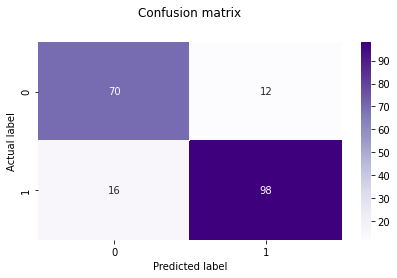

In [7]:
# Visualizes the results of the logistic regression
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

fig, ax = plt.subplots()
plt.xlim([0,1])
plt.ylim([0,1])

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Purples")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.savefig("logistic_regr_graph.png")